##### **Importing Libraries:**

In [26]:
import requests
from bs4 import BeautifulSoup
import csv, json
from urllib.parse import urljoin
import pandas as pd
import re 
import matplotlib.pyplot as plt
import seaborn as sns

##### **Data Extraction:**

In [6]:
base_url = 'https://books.toscrape.com'
page_url = 'https://books.toscrape.com/catalogue/page-{}.html'

In [7]:
rating_map = {
    'One': 1,
    'Two': 2,
    'Three': 3,
    'Four': 4,
    'Five': 5
}

booksData = []

for page in range(1, 51):
    
    print(f'Scraping page-{page}...')
    
    if page == 1:
        url = base_url
    else:
        url = page_url.format(page)
        

    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')

    for book in soup.select('article.product_pod'):
        title = book.h3.a['title']
        price = book.select_one('.price_color').text
        availability = book.select_one('.availability').text.strip()

        rating_class = book.select_one('p.star-rating')['class']
        star_word = [cls for cls in rating_class if cls != 'star-rating'][0]
        stars = rating_map.get(star_word, 0)

        relative_link = book.h3.a['href']
        if 'catalogue/' not in relative_link:
            relative_link = 'catalogue/' + relative_link
        book_url = urljoin(base_url, relative_link)

        detail_res = requests.get(book_url)
        detail_soup = BeautifulSoup(detail_res.text, 'html.parser')

        desc_tag = detail_soup.select_one('#product_description ~ p')
        description = desc_tag.text.strip() if desc_tag else None

        table = detail_soup.select_one('table.table.table-striped')
        info = {row.th.text: row.td.text for row in table.select('tr')} if table else None
        upc = info.get('UPC', '') if info else None


        genre_tags = detail_soup.select('ul.breadcrumb li > a')
        
        genre_tag = genre_tags[2].text.strip() if len(genre_tags) > 2 else None


        booksData.append({
            'title': title,
            'price': price,
            'availability': availability,
            'stars': stars,
            'url': book_url,
            'description': description,
            'upc': upc,
            'genre': genre_tag,
        })

Scraping page-1...


KeyboardInterrupt: 

##### **Saving data:**

In [ ]:
with open('books.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.DictWriter(f, fieldnames=booksData[0].keys())
    writer.writeheader()
    writer.writerows(booksData)

In [ ]:
with open('books.json', 'w', encoding='utf-8') as f:
    json.dump(booksData, f, indent=4, ensure_ascii=False)

##### **Data Cleaning & Processing:**

In [30]:
df = pd.read_csv('books.csv')

df.sample(10)

,title,price,availability,stars,url,description,upc,genre
712,The Wild Robot,Â£56.07,In stock,3,https://books.toscrape.com/catalogue/the-wild-...,When robot Roz opens her eyes for the first ti...,75fed6a47f69859d,Childrens
92,Mama Tried: Traditional Italian Cooking for th...,Â£14.02,In stock,4,https://books.toscrape.com/catalogue/mama-trie...,Cecilia Granata grew up cooking with her famil...,72f9d5be3472d34e,Food and Drink
177,"Nightingale, Sing",Â£38.28,In stock,1,https://books.toscrape.com/catalogue/nightinga...,A teenage vigilante and a ruthless gangster co...,50b8f80311b31ede,Young Adult
512,Team of Rivals: The Political Genius of Abraha...,Â£20.12,In stock,5,https://books.toscrape.com/catalogue/team-of-r...,The life and times of Abraham Lincoln have bee...,ba047a636b7d3793,Add a comment
399,Off the Hook (Fishing for Trouble #1),Â£47.67,In stock,3,https://books.toscrape.com/catalogue/off-the-h...,"Welcome to The Buoys, a West Coast haven where...",b783ce08802cd1d1,Romance
357,Tipping Point for Planet Earth: How Close Are ...,Â£37.55,In stock,1,https://books.toscrape.com/catalogue/tipping-p...,Tipping Point for Planet Earth explains why Ea...,148715df5a02ea5e,Science
73,Spark Joy: An Illustrated Master Class on the ...,Â£41.83,In stock,4,https://books.toscrape.com/catalogue/spark-joy...,Marie Kondoâs unique KonMari Method of tidyi...,87b0615b6e1f4d7b,Nonfiction
367,The Children,Â£11.88,In stock,3,https://books.toscrape.com/catalogue/the-child...,From New York Times bestselling author Ann Lea...,64fd010bf8d15096,Add a comment
304,Glory over Everything: Beyond The Kitchen House,Â£45.84,In stock,3,https://books.toscrape.com/catalogue/glory-ove...,From the author of the New York Times bestsell...,de4b403cb629a29f,Historical Fiction
860,Civilization and Its Discontents,Â£59.95,In stock,2,https://books.toscrape.com/catalogue/civilizat...,It stands as a brilliant summary of the views ...,396385e3de5d18c3,Psychology


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         1000 non-null   object
 1   price         1000 non-null   object
 2   availability  1000 non-null   object
 3   stars         1000 non-null   int64 
 4   url           1000 non-null   object
 5   description   998 non-null    object
 6   upc           1000 non-null   object
 7   genre         1000 non-null   object
dtypes: int64(1), object(7)
memory usage: 62.6+ KB


In [ ]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         998 non-null    object
 1   price         998 non-null    object
 2   availability  998 non-null    object
 3   stars         998 non-null    int64 
 4   url           998 non-null    object
 5   description   998 non-null    object
 6   upc           998 non-null    object
 7   genre         998 non-null    object
dtypes: int64(1), object(7)
memory usage: 70.2+ KB


In [36]:
df.duplicated().sum()

0

In [38]:
df['price'] = df['price'].apply(lambda x: re.sub(r'Â£','', x))
df.head()

,title,price,availability,stars,url,description,upc,genre
0,A Light in the Attic,51.77,In stock,3,https://books.toscrape.com/catalogue/a-light-i...,It's hard to imagine a world without A Light i...,a897fe39b1053632,Poetry
1,Tipping the Velvet,53.74,In stock,1,https://books.toscrape.com/catalogue/tipping-t...,"""Erotic and absorbing...Written with starling ...",90fa61229261140a,Historical Fiction
2,Soumission,50.10,In stock,1,https://books.toscrape.com/catalogue/soumissio...,"Dans une France assez proche de la nÃ´tre, un ...",6957f44c3847a760,Fiction
3,Sharp Objects,47.82,In stock,4,https://books.toscrape.com/catalogue/sharp-obj...,"WICKED above her hipbone, GIRL across her hear...",e00eb4fd7b871a48,Mystery
4,Sapiens: A Brief History of Humankind,54.23,In stock,5,https://books.toscrape.com/catalogue/sapiens-a...,From a renowned historian comes a groundbreaki...,4165285e1663650f,History


In [40]:
#fix dtype for price col 
df['price']=df['price'].astype('float')
df.dtypes

title            object
price           float64
availability     object
stars             int64
url              object
description      object
upc              object
genre            object
dtype: object

In [42]:
#We are making sure the URL is correct using regex
matches=df.url.apply(lambda x: bool(re.match(r'https://books.toscrape.com/catalogue/[\w-]+/index.html',x)))
df=df[matches]
df.head()

,title,price,availability,stars,url,description,upc,genre
0,A Light in the Attic,51.77,In stock,3,https://books.toscrape.com/catalogue/a-light-i...,It's hard to imagine a world without A Light i...,a897fe39b1053632,Poetry
1,Tipping the Velvet,53.74,In stock,1,https://books.toscrape.com/catalogue/tipping-t...,"""Erotic and absorbing...Written with starling ...",90fa61229261140a,Historical Fiction
2,Soumission,50.10,In stock,1,https://books.toscrape.com/catalogue/soumissio...,"Dans une France assez proche de la nÃ´tre, un ...",6957f44c3847a760,Fiction
3,Sharp Objects,47.82,In stock,4,https://books.toscrape.com/catalogue/sharp-obj...,"WICKED above her hipbone, GIRL across her hear...",e00eb4fd7b871a48,Mystery
4,Sapiens: A Brief History of Humankind,54.23,In stock,5,https://books.toscrape.com/catalogue/sapiens-a...,From a renowned historian comes a groundbreaki...,4165285e1663650f,History


##### **Data Analysis and Visualization**

In [45]:
data=df.groupby('genre')['stars'].mean().round()
df.genre.unique()

array(['Poetry', 'Historical Fiction', 'Fiction', 'Mystery', 'History',
       'Young Adult', 'Business', 'Default', 'Sequential Art', 'Music',
       'Science Fiction', 'Politics', 'Travel', 'Thriller',
       'Food and Drink', 'Romance', 'Childrens', 'Nonfiction', 'Art',
       'Spirituality', 'Philosophy', 'New Adult', 'Contemporary',
       'Fantasy', 'Add a comment', 'Science', 'Health', 'Horror',
       'Self Help', 'Religion', 'Christian', 'Crime', 'Autobiography',
       'Christian Fiction', 'Biography', 'Womens Fiction', 'Erotica',
       'Cultural', 'Psychology', 'Humor', 'Historical', 'Novels',
       'Short Stories', 'Suspense', 'Classics', 'Academic',
       'Sports and Games', 'Adult Fiction', 'Parenting', 'Paranormal'],
      dtype=object)

C:\Users\Mohamed\AppData\Local\Temp\ipykernel_11528\3383276283.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data.index,x=data.values,palette='viridis')


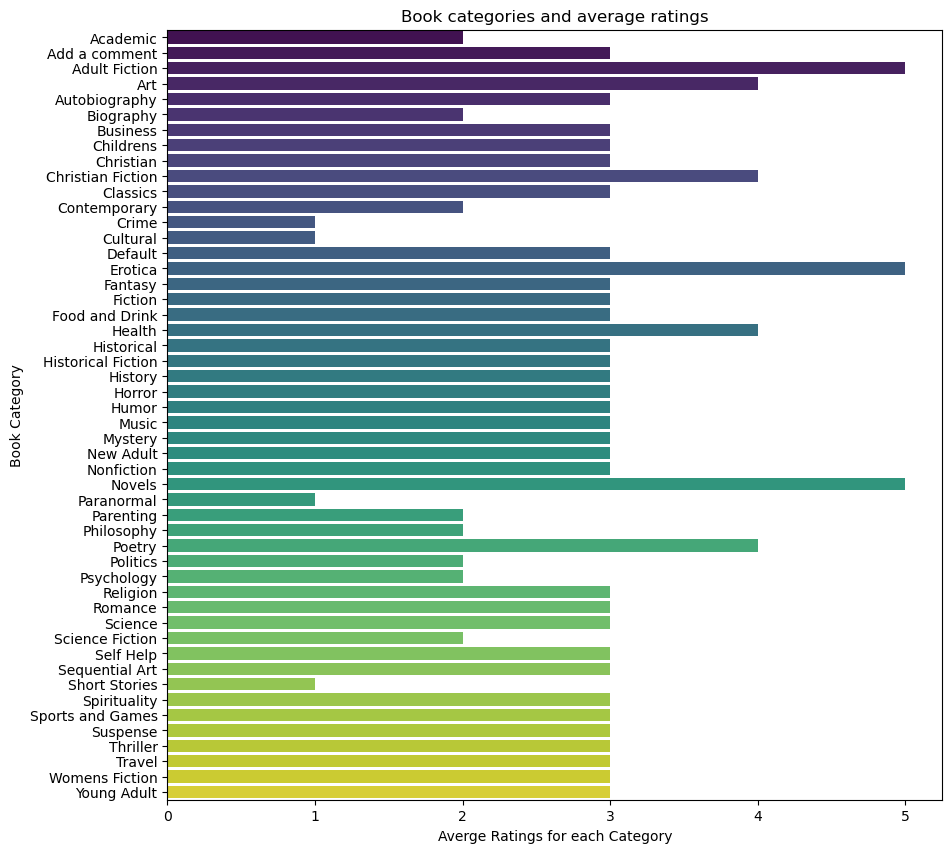

In [47]:
plt.figure(figsize=(10,10))
sns.barplot(y=data.index,x=data.values,palette='viridis')
plt.ylabel('Book Category')
plt.xlabel('Averge Ratings for each Category')
plt.title('Book categories and average ratings')
plt.show()

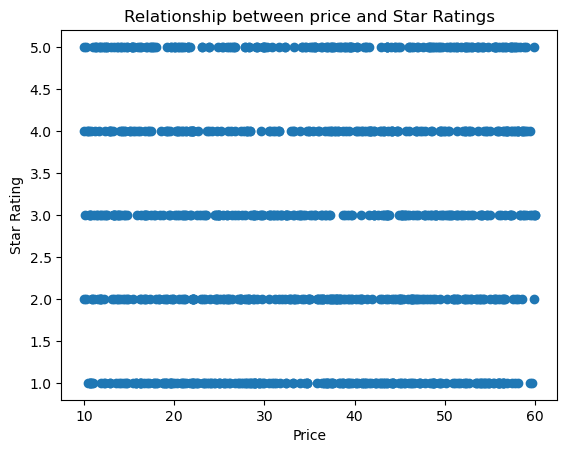

In [49]:
plt.scatter(df.price,df.stars)
plt.title('Relationship between price and Star Ratings')
plt.xlabel('Price')
plt.ylabel('Star Rating')
plt.show()

A plot showing no relationship between book price and ratings.

In [52]:
categories=df.genre.value_counts().reset_index()
categories=categories.sort_values(by='count', ascending=False).head(10)
categories

,genre,count
0,Default,151
1,Nonfiction,110
2,Sequential Art,75
3,Add a comment,67
4,Fiction,65
5,Young Adult,54
6,Fantasy,48
7,Romance,35
8,Mystery,32
9,Food and Drink,30


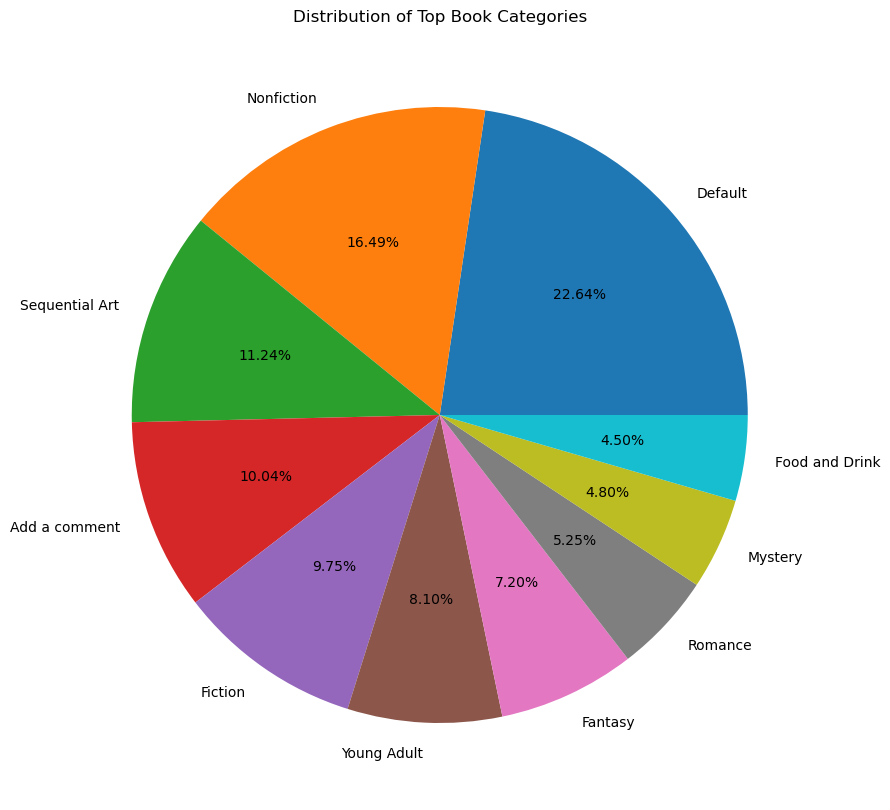

In [54]:
plt.figure(figsize=(10,10))
plt.pie(categories['count'],labels=categories['genre'],autopct='%0.2f%%')
plt.title('Distribution of Top Book Categories')
plt.show()

<Axes: title={'center': 'price'}, xlabel='[genre]'>

<Figure size 2000x1000 with 0 Axes>

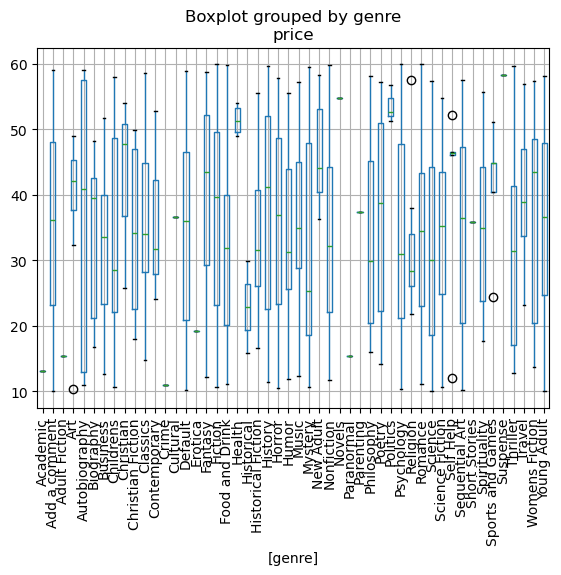

In [56]:
plt.figure(figsize=(20,10))
data=df[['genre','price']]
data.boxplot(by='genre',rot=90)

In [66]:
from wordcloud import WordCloud

In [62]:
#visualize word cloud for sequentil art descreption and see the most frequent words in this genre
art_description=df[df['genre']=='Sequential Art']
art_description.sample(6)

,title,price,availability,stars,url,description,upc,genre
85,"Outcast, Vol. 1: A Darkness Surrounds Him (Out...",15.44,In stock,4,https://books.toscrape.com/catalogue/outcast-v...,NEW HORROR SERIES FROM THE WALKING DEAD CREATO...,889139b8e9c4cb36,Sequential Art
332,Batman: Europa,32.01,In stock,2,https://books.toscrape.com/catalogue/batman-eu...,The long-awaited 4-issue miniseries is collect...,bf68dcb5fad3cc8c,Sequential Art
966,"Ms. Marvel, Vol. 1: No Normal (Ms. Marvel (201...",39.39,In stock,4,https://books.toscrape.com/catalogue/ms-marvel...,"Marvel Comics presents the new Ms. Marvel, the...",35a60467893aa168,Sequential Art
94,"Lumberjanes, Vol. 1: Beware the Kitten Holy (L...",45.61,In stock,3,https://books.toscrape.com/catalogue/lumberjan...,FRIENDSHIP TO THE MAX!At Miss Qiunzilla Thiskw...,b6ee99bcf06fc91f,Sequential Art
60,The Nameless City (The Nameless City #1),38.16,In stock,4,https://books.toscrape.com/catalogue/the-namel...,Every nation that invades the City gives it a ...,7d385d34d12e60ff,Sequential Art
793,Prodigy: The Graphic Novel (Legend: The Graphi...,43.63,In stock,3,https://books.toscrape.com/catalogue/prodigy-t...,The second book in the best-selling Legend tri...,9707989a439757b4,Sequential Art


In [64]:
art_description_text=' '.join(art_description['description'])
art_description_text

'Scott Pilgrim\'s life is totally sweet. He\'s 23 years old, he\'s in a rockband, he\'s "between jobs" and he\'s dating a cute high school girl. Nothing could possibly go wrong, unless a seriously mind-blowing, dangerously fashionable, rollerblading delivery girl named Ramona Flowers starts cruising through his dreams and sailing by him at parties. Will Scott\'s awesome life get Scott Pilgrim\'s life is totally sweet. He\'s 23 years old, he\'s in a rockband, he\'s "between jobs" and he\'s dating a cute high school girl. Nothing could possibly go wrong, unless a seriously mind-blowing, dangerously fashionable, rollerblading delivery girl named Ramona Flowers starts cruising through his dreams and sailing by him at parties. Will Scott\'s awesome life get turned upside-down? Will he have to face Ramona\'s seven evil ex-boyfriends in battle? The short answer is yes. The long answer is Scott Pilgrim, Volume 1: Scott Pilgrim\'s Precious Little Life ...more DUAL WORLDS, DUAL SIGHTS In the lan

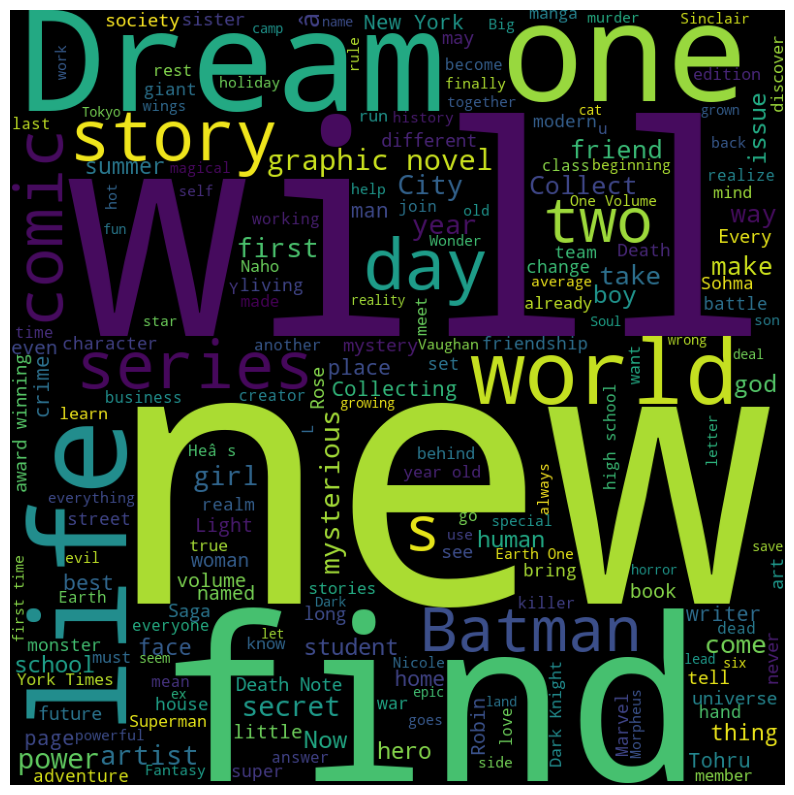

In [86]:
word=WordCloud(width=800,height=800).generate(art_description_text)
plt.figure(figsize=(10,15))
plt.imshow(word)
plt.axis('off')
plt.show()